<a href="https://colab.research.google.com/github/Zobya/machine-learning-algos-Using-Python/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#select the vakue of k, k= no.of nearest points from the new point, whatever points is in majority, the point belongs to that class
#how to choose value of k

'''least distance measure:
   euclidean distance: (hypo)
   manhattan: |5-1|+|4-1|
   '''

# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import csv
import pandas as pd

# IMPORT THE IRIS DATA FROM THE
# SKLEARN MODULE
from sklearn.datasets import load_iris



# LOAD THE IRIS DATASET BY CALLING
# THE FUNCTION
iris_data = load_iris()

# PLACE THE IRIS DATA IN A PANDAS
# DATAFRAME
df = pd.DataFrame(data=iris_data.data,
                  columns=iris_data.feature_names)

#Print the loaded data

print("Given dataset is: \n {}".format(df))
print("Dataset shape: {}".format(df.shape))

Given dataset is: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Dataset shape: (150,

In [ ]:
df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
list(data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
list(data.target_names)
['setosa', 'versicolor', 'virginica']

Given dataset is: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Dataset shape: (150,

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
feature_columns = data.feature_names
X = data.data
y = data.target

print("x is: \n {}".format(X))
print("target is: \n {}".format(y))

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values


x is: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''arr=np.array([[12,13,14],[23,24,25],[26,17,18]])
print(arr)
ai=np.split(arr, 3, axis=1)
print(ai[0])'''

xi=np.split(X,4,axis=1)
sepal_length=xi[0]
print(sepal_length)


[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

Text(0, 0.5, 'sepal length')

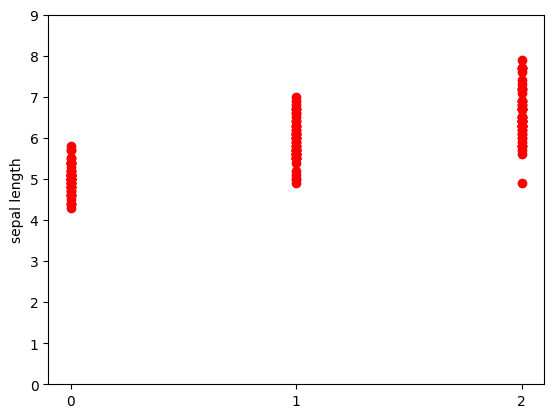

In [ ]:
plt.scatter(y,xi[0], color='red')
plt.xticks([0,1,2])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel=('0:setosa  1: versicoloue  2: virginica')
plt.ylabel('sepal length')

Text(0, 0.5, 'sepal_width')

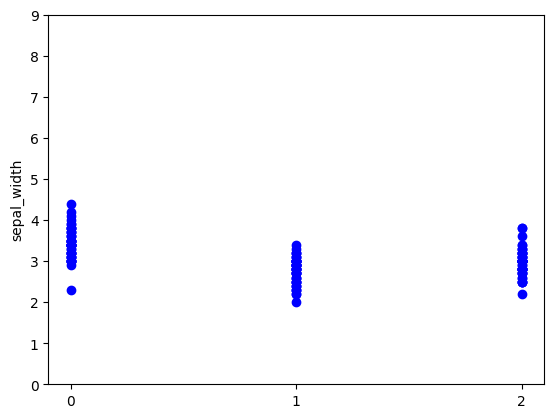

In [ ]:
plt.rcdefaults()
plt.scatter(y,xi[1], color='blue')
plt.xticks([0,1,2])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel=('0:setosa  1: versicoloue  2: virginica')
plt.ylabel('sepal_width')

Text(0.5, 1.0, '0:setosa  1: versicoloue  2: virginica')

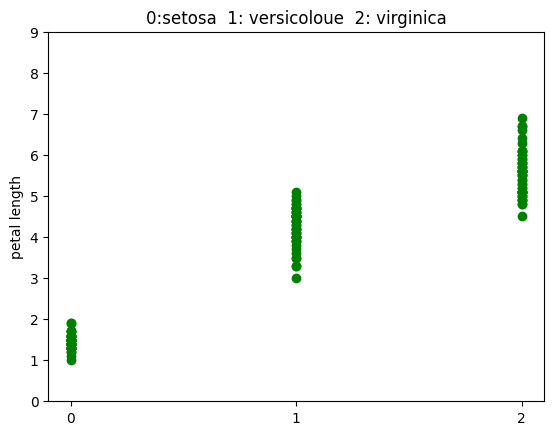

In [ ]:
plt.rcdefaults()
plt.scatter(y,xi[2], color='green')
plt.xticks([0,1,2])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel('petal length')
plt.title('0:setosa  1: versicoloue  2: virginica')

Text(0.5, 1.0, '0:setosa  1: versicoloue  2: virginica')

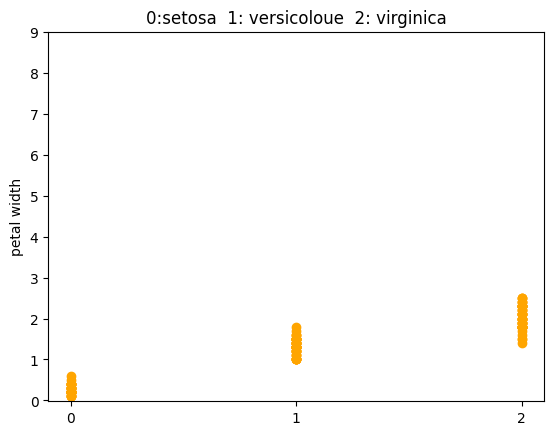

In [ ]:
plt.rcdefaults()
plt.scatter(y,xi[3], color='orange')
plt.xticks([0,1,2])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel('petal width')
plt.title('0:setosa  1: versicoloue  2: virginica')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("shape of training x is: \n {}".format(X_train.shape))
print("shape of testing x is: \n {}".format(X_test.shape))
print("shape of training y is: \n {}".format(y_train.shape))
print("shape of testing y is: \n {}".format(y_test.shape))

shape of training x is: 
 (120, 4)
shape of testing x is: 
 (30, 4)
shape of training y is: 
 (120,)
shape of testing y is: 
 (30,)


In [ ]:
#inorder to make prediction we need to calculate similarity between any two data instances,
#this is needed so that we can locate the k most similar data instances in the training set and make aprediction
#given that all 4 flower measurements are numeric and have same unit wecan use euclidian distance measurements
#we want to control which field to include in the distance calculations
import math
def euclideanDistance(instance1, instance2, length):
  #instance1 and instance2 are the two points for which we want to calculate the euclidean distance
  # length denote how many instances you want to include
  distance =0
  for x in range(length):
    distance +=pow((instance1[x]- instance2[x]),2)
  return math.sqrt(distance)

In [ ]:
#chcking if the method works:
data1 =[2,2,2,'a']
data2 =[4,4,4,'b']
distance = euclideanDistance(data1, data2,3)
print ('Distance: '+ repr(distance))

Distance: 3.4641016151377544


In [ ]:
#looking for k nearest neighbours. now that we have a similarity measure, we can use it to collect
#-k most similar instances for a given unseen instance.
# calculating distance for all the instances and selecting a subset with smallest distance value


In [ ]:
'''import numpy as np
#def get_neh(trainingS, testI, k):
distances=[]
dist=np.zeroes[10]
print(dist)
 # length = len(testI)-1
for x in range(len(trainingS)):
     dist = euclideanDistance(test, trainingS[x], length)
     distances.append((trainingSet[x],dist))
     np.push(dist)'''


'import numpy as np\n#def get_neh(trainingS, testI, k):\ndistances=[]\ndist=np.zeroes[10] \nprint(dist)\n # length = len(testI)-1\nfor x in range(len(trainingS)):\n     dist = euclideanDistance(test, trainingS[x], length)\n     distances.append((trainingSet[x],dist))\n     np.push(dist)'

In [ ]:
# selecting the smallest distance value
import operator
import numpy as np
def getNeighbors(trainingSet, testInstance, k):
  ''' returns k different points with the least distance from the testInstance'''
  distances=[]
  length = len(testInstance)-1
  for x in range(len(trainingSet)):
    dist = euclideanDistance(testInstance, trainingSet[x], length)
    distances.append((trainingSet[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x][0])
  return neighbors

In [ ]:
#testing if the function works
trainSet = [[2,2,2,'a'],[4,4,4,'b'],[3,3,3,'a'],[6,6,6,'b']]
testInstance = [5,5,5]
k=2
neighbors=getNeighbors(trainSet, testInstance,1)
print(neighbors)

[[4, 4, 4, 'b']]


In [ ]:
#passing iris dataset to the above func
testInstance=[6,3,5,2]
k=3
neighbors=getNeighbors(X_train, testInstance,1)
print(neighbors)

[array([6.1, 3. , 4.9, 1.8])]


In [ ]:
#skip this part
import numpy as np
def Mostcommonclass(neighbors):
  count0=0
  count1=0

  t=np.split(neighbors,4,axis=1)
  classarr=t[3]
  for x in classarr:
    if(x=='a'):
      count0=count0+1
    else:
      count1=count1+1
  if(count0>count1):
    return 'a'

  else:
    return 'b'
#shows error object of type int has no len


In [ ]:
#redicting a response based on those neighbours
import operator
def getResponse(neighbors):
  classVotes = {}
  for x in range(len(neighbors)):
    response = neighbors[x][-1] #?
    if response in classVotes:
      classVotes[response] +=1
    else:
      classVotes[response]=1
    sortedVotes = sorted(classVotes.items(),key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [ ]:
neighbors = [[1,1,1,'a'],[2,2,2,'b'],[3,3,3,'a']]
response= getResponse(neighbors)
print(response)

a


In [ ]:
#checking acuuracy
def getAccuracy(testSet, predictions):
  correct =0
  for x in range(len(testSet)):
    if testSet[x][-1] is predictions[x]:
      correct +=1
  return (correct/float(len(testSet)))* 100.0

In [ ]:
testSet = [[1,1,1,'a'],[2,2,2,'a'],[3,3,3,'b']]
predictions = ['a','a','a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
print(X_test)
print(y_pred)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9666666666666667


In [ ]:
#Rebuild kNN Classification model using k=5
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9667


In [ ]:
#Rebuild kNN Classification model using k=7
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 1.0


In [ ]:
#Rebuild kNN Classification model using k=8
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 1.0000


In [ ]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 1.0000


In [ ]:
# instantiate the model with k=50
knn_50 = KNeighborsClassifier(n_neighbors=50)


# fit the model to the training set
knn_50.fit(X_train, y_train)


# predict on the test-set
y_pred_50 = knn_50.predict(X_test)


print('Model accuracy score with k=50 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=50 : 0.8667


In [ ]:
#confusion matrix
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue setosa = ', cm[0,0])

print('\nFalse setosa = ', cm[0,1]+ cm[0,2])

print('\nTrue versicoloue= ', cm[1,1])

print('\nFalse versicoloue = ', cm[1,0]+cm[1,2])

print('\nTrue Virginica = ', cm[2,2])

print('\nFalse Virginica = ', cm[2,0]+cm[2,1])

Confusion matrix

 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

True setosa =  11

False setosa =  0

True versicoloue=  12

False versicoloue =  1

True Virginica =  6

False Virginica =  0


In [ ]:
cm_5 = confusion_matrix(y_test, y_pred_5)


print('Confusion matrix\n\n', cm_5)

print('\nTrue setosa = ', cm_5[0,0])

print('\nFalse setosa = ', cm_5[0,1]+ cm_5[0,2])

print('\nTrue versicoloue= ', cm_5[1,1])

print('\nFalse versicoloue = ', cm_5[1,0]+cm_5[1,2])

print('\nTrue Virginica = ', cm_5[2,2])

print('\nFalse Virginica = ', cm_5[2,0]+cm_5[2,1])

Confusion matrix

 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

True setosa =  11

False setosa =  0

True versicoloue=  12

False versicoloue =  1

True Virginica =  6

False Virginica =  0


In [ ]:
cm_8 = confusion_matrix(y_test, y_pred_8)

print('Confusion matrix\n\n', cm_8)

print('\nTrue Positives(TP) = ', cm_8[0,0])

print('\nTrue Negatives(TN) = ', cm_8[1,1])

print('\nFalse Positives(FP) = ', cm_8[0,1])

print('\nFalse Negatives(FN) = ', cm_8[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
cm50 = confusion_matrix(y_test, y_pred_50)


print('Confusion matrix\n\n', cm50)

print('\nTrue setosa = ', cm50[0,0])

print('\nFalse setosa = ', cm50[0,1]+ cm50[0,2])

print('\nTrue versicoloue= ', cm50[1,1])

print('\nFalse versicoloue = ', cm50[1,0]+cm50[1,2])

print('\nTrue Virginica = ', cm50[2,2])

print('\nFalse Virginica = ', cm50[2,0]+cm50[2,1])

Confusion matrix

 [[11  0  0]
 [ 0 11  2]
 [ 0  2  4]]

True setosa =  11

False setosa =  0

True versicoloue=  11

False versicoloue =  2

True Virginica =  4

False Virginica =  2


In [ ]:
#precision score
'''precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))'''

"precision = TP / float(TP + FP)\nprint('Precision : {0:0.4f}'.format(precision))"